### Official website
[Official website](http://stanford.edu/~mwaskom/software/seaborn/index.html)        
[All kinds of plots](http://stanford.edu/~mwaskom/software/seaborn/api.html)

### Other learning materials
[tonight](http://blog.insightdatalabs.com/advanced-functionality-in-seaborn/)    
[中文](http://nbviewer.jupyter.org/github/yihongfa/pythondata/blob/master/Seaborn.ipynb)

In [1]:
import numpy as np
import pandas as pd

%pylab inline
import seaborn as sns
sns.set_style('darkgrid')

Populating the interactive namespace from numpy and matplotlib


In [4]:
names = [
       'mpg'
    ,  'cylinders'
    ,  'displacement'
    ,  'horsepower'
    ,  'weight'
    ,  'acceleration'
    ,  'model_year'
    ,  'origin'
    ,  'car_name'
]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", sep='\s+', names=names)
df['maker'] = df.car_name.map(lambda x: x.split()[0])
df.origin = df.origin.map({1: 'America', 2: 'Europe', 3: 'Asia'})
df=df.applymap(lambda x: np.nan if x == '?' else x).dropna()
df['horsepower'] = df.horsepower.astype(float)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,maker
0,18,8,307,130,3504,12.0,70,America,chevrolet chevelle malibu,chevrolet
1,15,8,350,165,3693,11.5,70,America,buick skylark 320,buick
2,18,8,318,150,3436,11.0,70,America,plymouth satellite,plymouth
3,16,8,304,150,3433,12.0,70,America,amc rebel sst,amc
4,17,8,302,140,3449,10.5,70,America,ford torino,ford


# factorplot and FacetGrid
**Conditional plot**: A conditional plot, also known as a coplot or subset plot, is a plot of two variables contional on the value of a third variable (called the conditioning variable). The conditioning variable may be either a variable that takes on only a few discrete values or a continuous variable that is divided into a limited number of subsets.

**factorplot and FacetGrid are for drawing conditional plots of segmented data**

C:\Python27\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


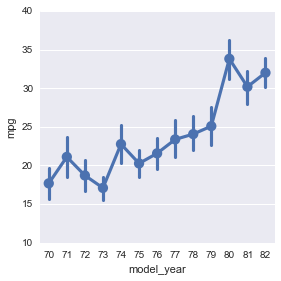

In [7]:
# x = x axis, y = y axis
sns.factorplot(data=df, x="model_year", y="mpg")

we can also segment by, say, region of origin:

C:\Python27\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


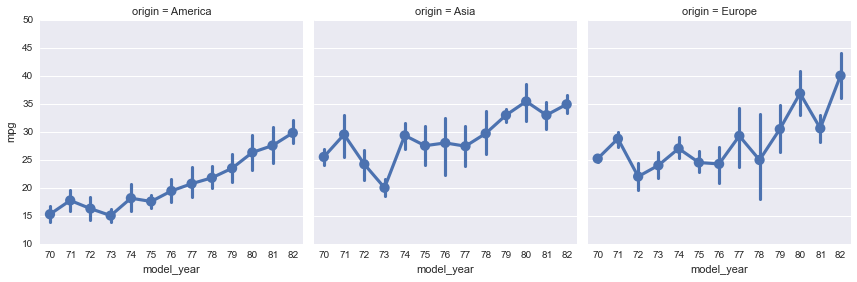

In [4]:
sns.factorplot(data=df, x="model_year", y="mpg", col="origin")

Compared with factorplot, the FacetGrid object is a slightly more complex, but also more powerful, take on the same idea.    

Let's say that we wanted to see KDE plots of the MPG distributions, separated by country of origin:

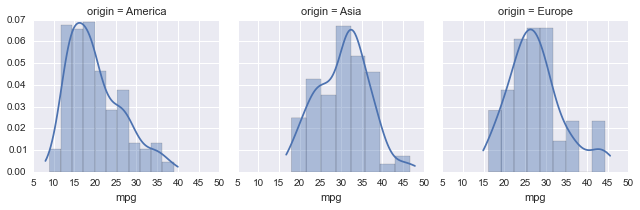

In [6]:
g = sns.FacetGrid(df, col="origin") # create grids according to 'col'
g.map(sns.distplot, "mpg") 

Let's say that we wanted to see scatter plots of MPG against horsepower with the same origin segmentation

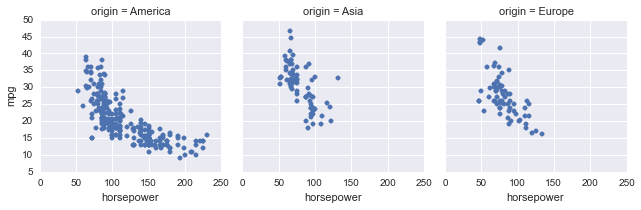

In [8]:
g = sns.FacetGrid(df, col="origin")  
g.map(plt.scatter, "horsepower", "mpg")  

Using FacetGrid, we can map any plotting function onto each segment of our data. For example, above we gave plt.scatter to g.map, which tells Seaborn to apply the matplotlib plt.scatter function to each of segments in our data. We don't need to use plt.scatter, though; we can use any function that understands the input data.

(0, 60)

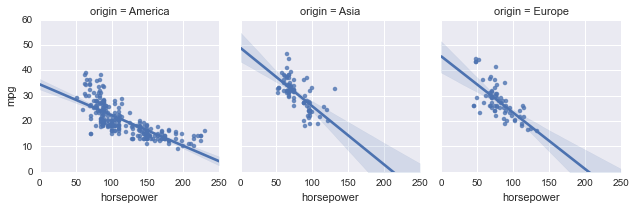

In [9]:
g = sns.FacetGrid(df, col="origin")  
g.map(sns.regplot, "horsepower", "mpg")  
plt.xlim(0, 250)  
plt.ylim(0, 60)

# pairplot and PairGrid
pairplot and PairGrid are for showing the interactions between variables.

## [pairplot](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

In [14]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


pairplot： 两两匹配

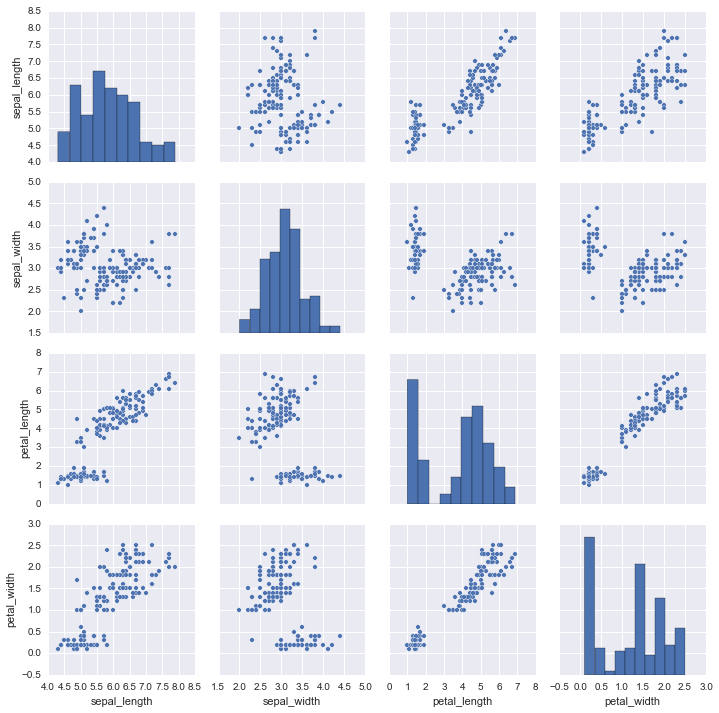

In [48]:
g = sns.pairplot(iris)

hue : string (variable name), optional
> Variable in data to map plot aspects to different colors.

按照 hub 指定的 column 分类

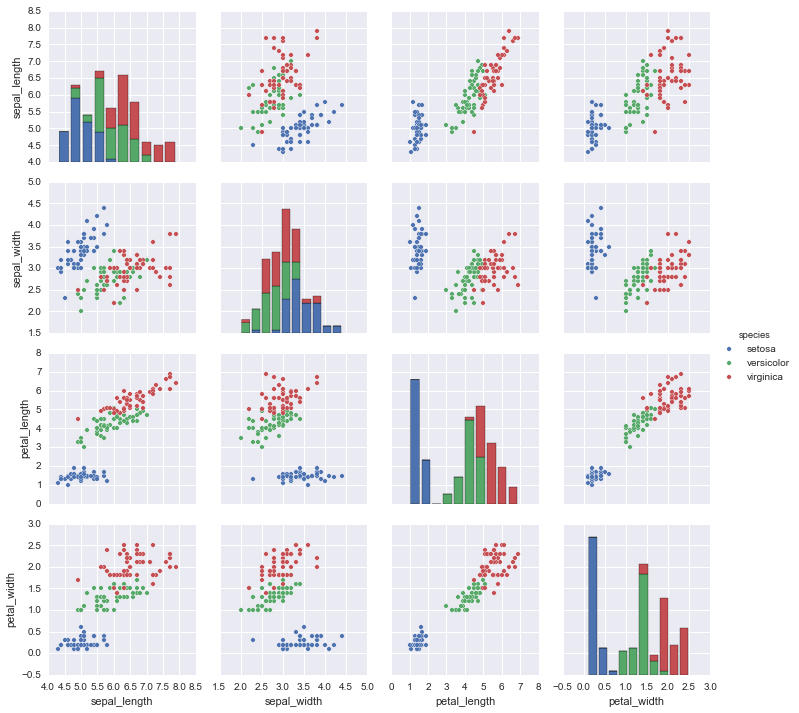

In [16]:
g = sns.pairplot(iris, hue="species")

palette : dict or seaborn color palette
> Set of colors for mapping the hue variable. If a dict, keys should be values in the hue variable.

[color的选择在这里](http://stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html): "hls", "husl", "Paired", "Set2", "Blues", "BuGn_r", "GnBu_d", "cubehelix", ""BrBG", "RdBu_r", "coolwarm" etc.

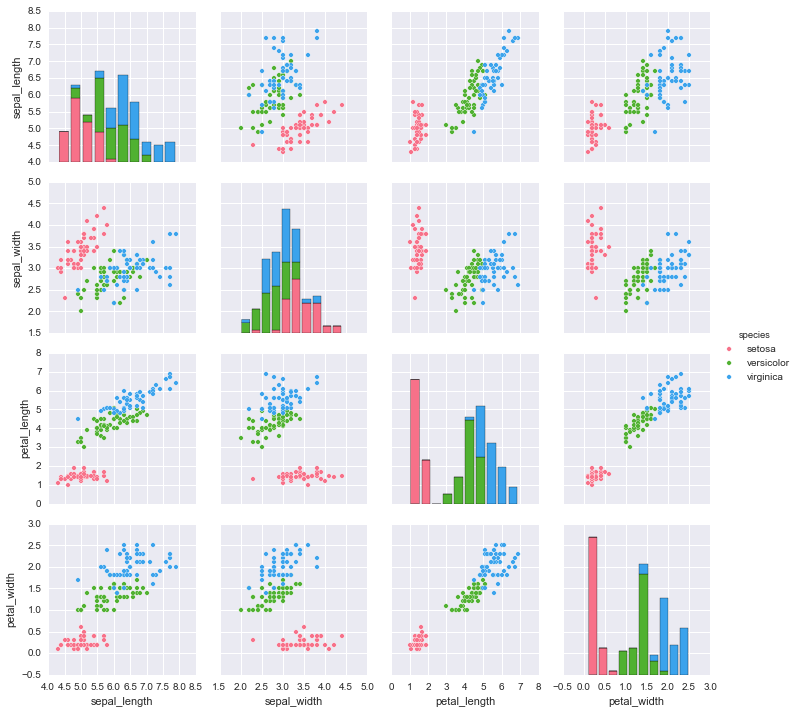

In [37]:
g = sns.pairplot(iris, hue="species", palette="husl")

markers : single matplotlib marker code or list, optional
> Either the marker to use for all datapoints or a list of markers with a length the same as the number of levels in the hue variable so that differently colored points will also have different scatterplot markers.

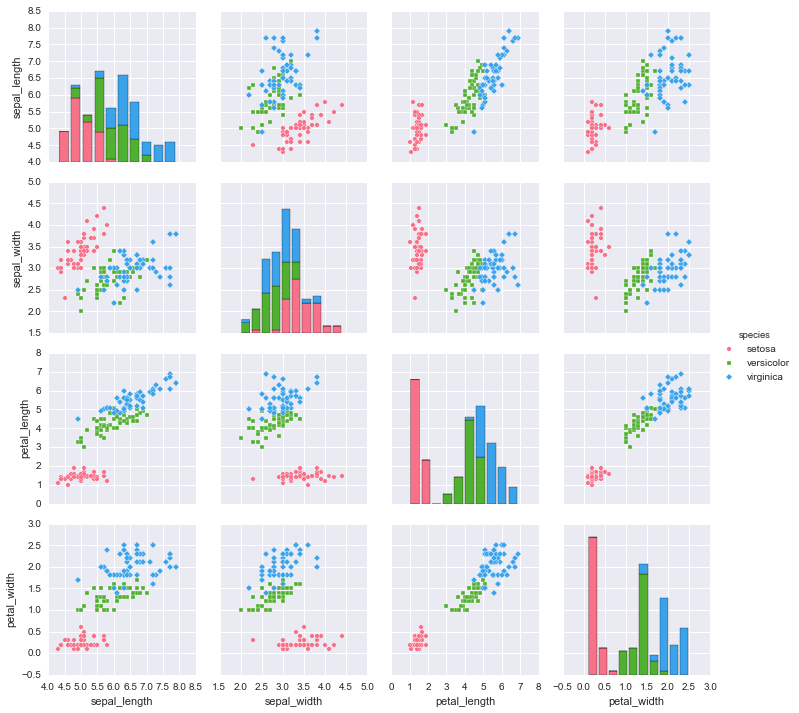

In [38]:
g = sns.pairplot(iris, hue="species", palette="husl", markers=["o", "s", "D"])

vars : list of variable names, optional
> Variables within data to use, otherwise use every column with a numeric datatype.

size : scalar, optional
> Height (in inches) of each facet

vars 指定要出图的column(s), size 指定出图的大小

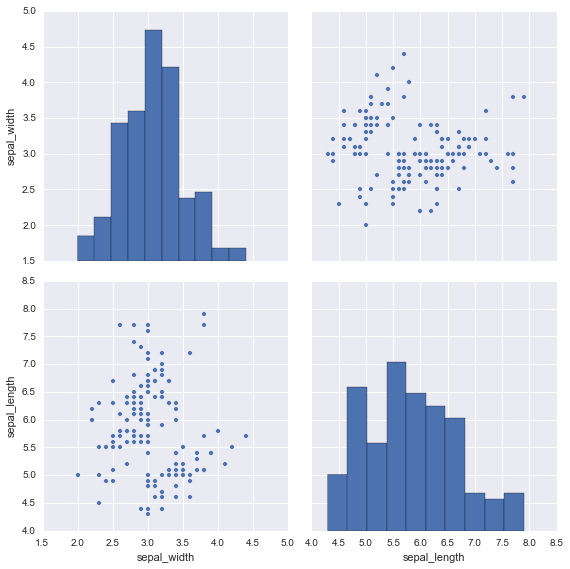

In [43]:
g = sns.pairplot(iris, vars=["sepal_width", "sepal_length"], size=4)

{x, y}_vars : lists of variable names, optional
> Variables within data to use separately for the rows and columns of the figure; i.e. to make a non-square plot.

指定 x, y 轴对应的 column(s)

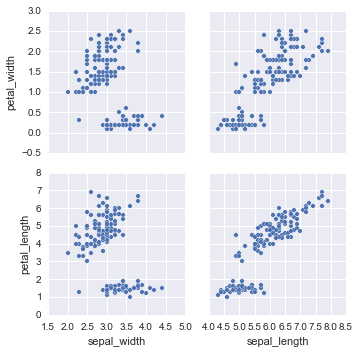

In [44]:
g = sns.pairplot(iris,
                 x_vars=["sepal_width", "sepal_length"],
                 y_vars=["petal_width", "petal_length"])

diag_kind : {‘hist’, ‘kde’}, optional
> Kind of plot for the diagonal subplots.

diag_kind 默认 'hist', 可指定成 'kde'

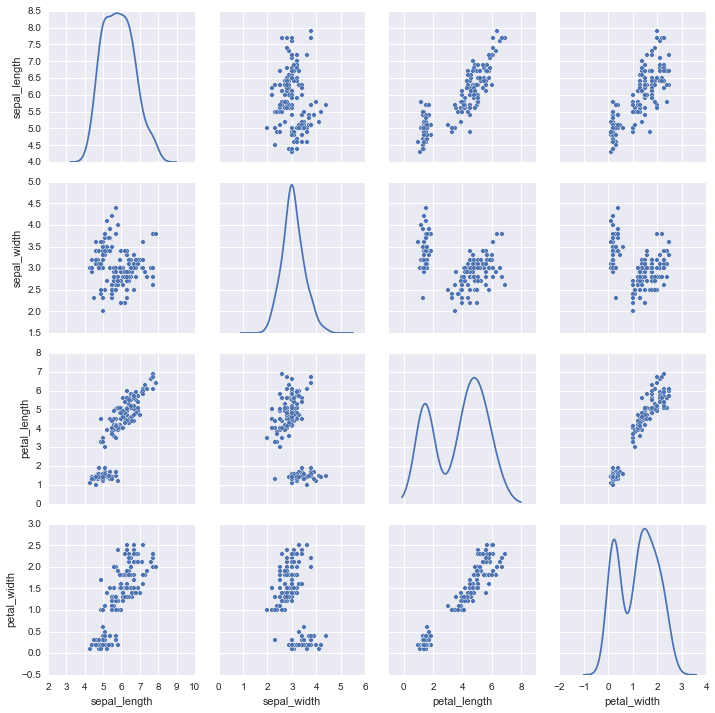

In [46]:
g = sns.pairplot(iris, diag_kind="kde")

kind : {'scatter', 'reg'}, optional
> Kind of plot for the non-identity relationships.

kind 默认 'scatter', 可指定成 'reg': 即 draw a line upon the picture

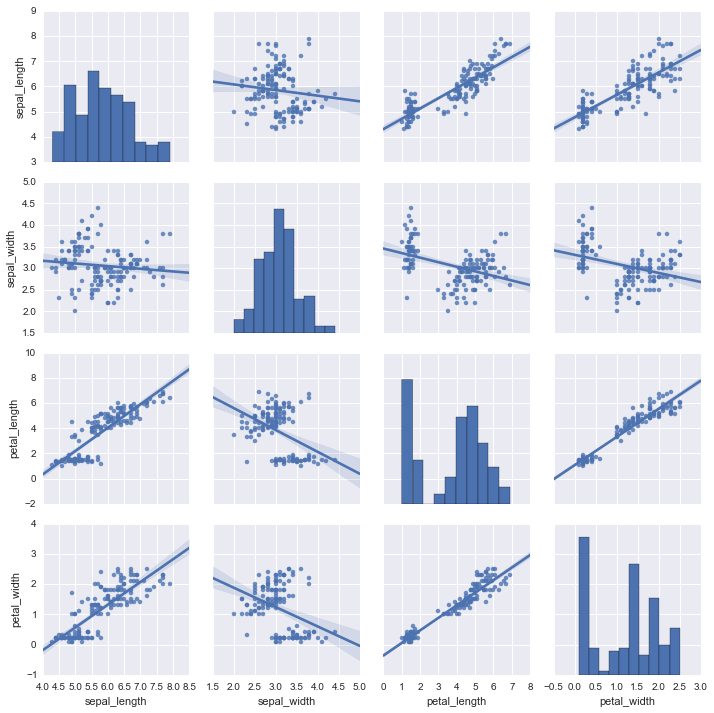

In [50]:
g = sns.pairplot(iris, kind="reg")

{plot, diag, grid}_kws : dicts, optional
> Dictionaries of keyword arguments.

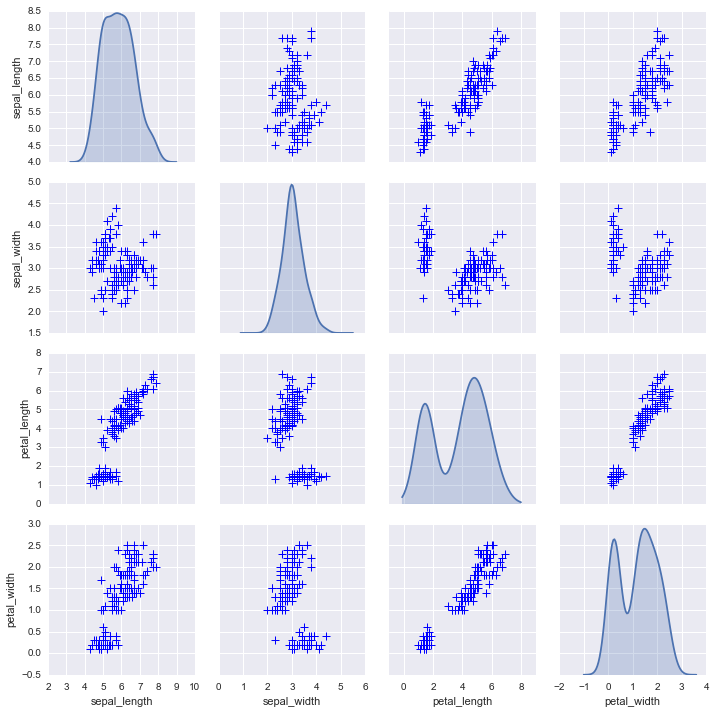

In [53]:
g = sns.pairplot(iris, diag_kind="kde", markers="+",
                 plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                 diag_kws=dict(shade=True))

## [PairGrid](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.PairGrid.html#seaborn.PairGrid)

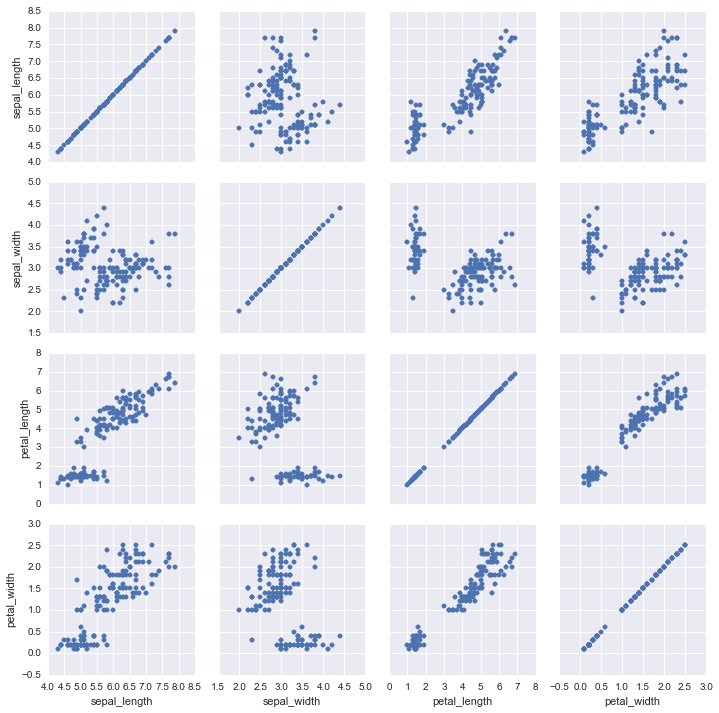

In [55]:
g = sns.PairGrid(iris)  # create grid
g = g.map(plt.scatter)  # decide structure of data

## [seaborn.countplot](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.countplot.html)

In [7]:
import seaborn as sns
sns.set(style="darkgrid")
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
titanic['class'].value_counts()

Third     491
First     216
Second    184
dtype: int64

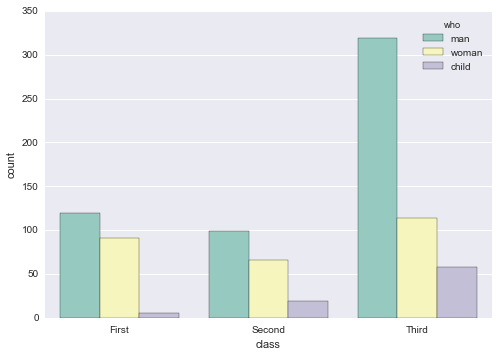

In [15]:
ax = sns.countplot(
    x = "class",  # x 轴以那一列为分类
    data = titanic,
    hue="who",    # 将 x 轴再按照 hub 这个列分类
    palette="Set3",  # 设定颜色
)

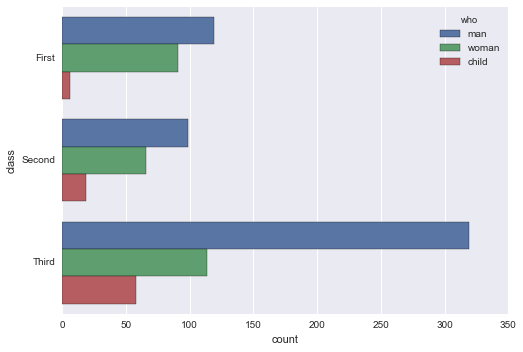

In [14]:
ax = sns.countplot(
    y = "class",  # 在 y 轴上 plot 图
    data = titanic,
    hue="who",    # 将 x 轴再按照 hub 这个列分类
)